In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
Dataset=pd.read_csv('creditcard_2023.csv')

In [3]:
print(Dataset)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [4]:
Dataset.isnull().sum().max()

0

In [5]:
print('No Frauds', round(Dataset['Class'].value_counts()[0]/len(Dataset) * 100,2), '% of the dataset')
print('Frauds', round(Dataset['Class'].value_counts()[1]/len(Dataset) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


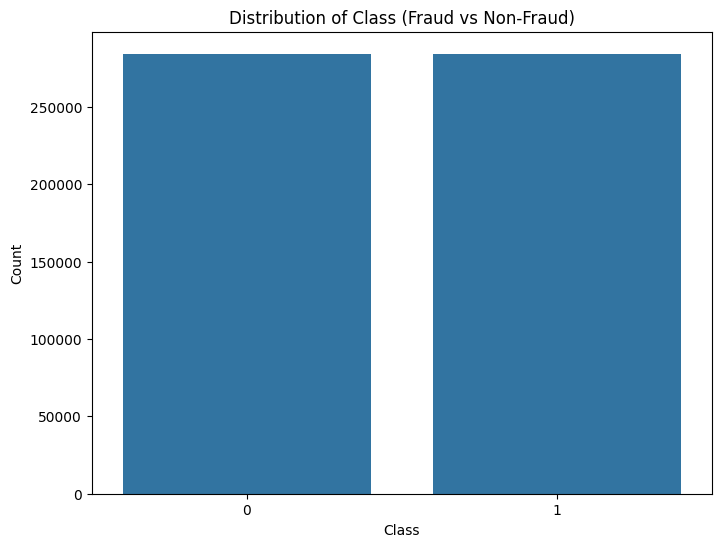

In [6]:
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=Dataset, x='Class')
plt.title('Distribution of Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

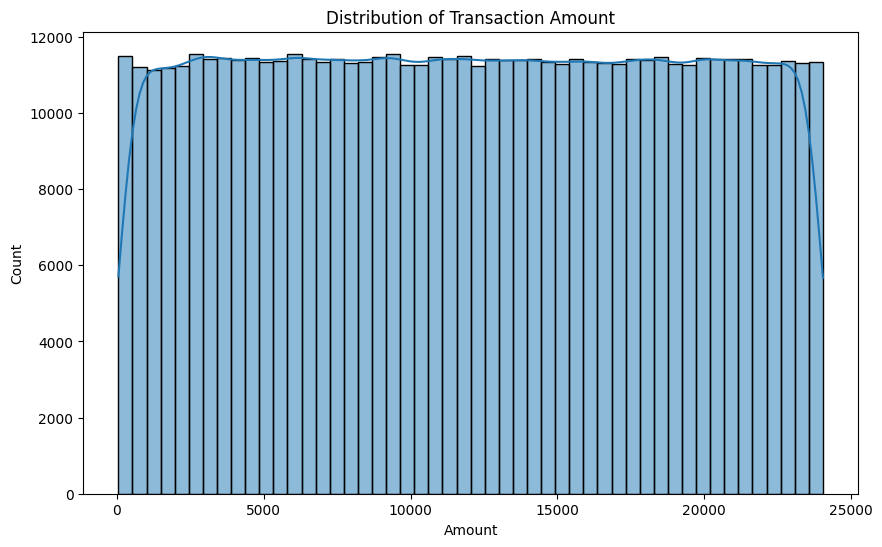

In [7]:
# Visualize the distribution of 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data=Dataset, x='Amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

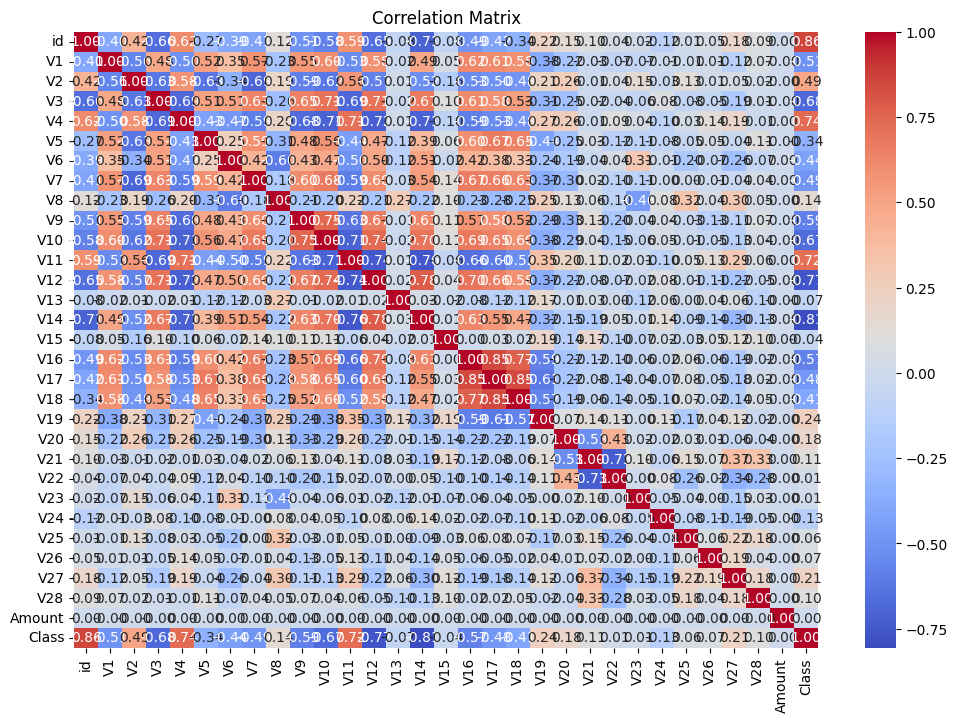

In [8]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(Dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
X=Dataset.drop(['id','Class'],axis=1)
y=Dataset.Class

In [10]:
print(X.shape)
print(y.shape)

(568630, 29)
(568630,)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler
minscaler=MinMaxScaler()
X_train=minscaler.fit_transform(X_train)
X_test=minscaler.transform(X_test)

In [14]:
print(X_train)

[[0.46473922 0.93683088 0.11951897 ... 0.10766445 0.35135942 0.31635995]
 [0.50978891 0.91081435 0.16816227 ... 0.08642029 0.34000214 0.73179819]
 [0.76915866 0.91825979 0.18478607 ... 0.08378579 0.33718947 0.18877637]
 ...
 [0.43837805 0.91527102 0.13739815 ... 0.10110411 0.34266977 0.78757995]
 [0.63446865 0.91730413 0.27093899 ... 0.08183923 0.33071888 0.28289298]
 [0.78869802 0.90627136 0.22313582 ... 0.08294045 0.3356094  0.08004362]]


In [15]:
print(X_test)

[[0.68407067 0.91842101 0.1510431  ... 0.09148521 0.34139499 0.35778235]
 [0.5688822  0.92433177 0.16230027 ... 0.08949392 0.33978271 0.51061196]
 [0.59004475 0.91698958 0.30700981 ... 0.08292636 0.33220236 0.21533461]
 ...
 [0.58982102 0.91666649 0.17058727 ... 0.08690072 0.33747591 0.7793194 ]
 [0.76912646 0.91273684 0.21788291 ... 0.08315813 0.33539013 0.65122393]
 [0.81105778 0.90271015 0.1995858  ... 0.08297996 0.33527259 0.22343509]]


In [16]:
 from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
selector=SelectKBest(score_func=chi2,k=15)
X_train_selected=selector.fit_transform(X_train,y_train)
X_test_selected=selector.transform(X_test)

In [18]:
Selected_feature=X.columns[selector.get_support()]
print("Selected features:", Selected_feature)

Selected features: Index(['V1', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V19', 'V24'],
      dtype='object')


In [19]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel=RandomForestClassifier(random_state=42)
randomforestmodel.fit(X_train_selected,y_train)

RandomForestClassifier(random_state=42)

In [20]:
TrainAccuracy=randomforestmodel.score(X_train_selected,y_train)
TestAccuracy=randomforestmodel.score(X_test_selected,y_test)

In [21]:
print(TrainAccuracy)

1.0


In [22]:
print(TestAccuracy)

0.9998452426173694


In [23]:
randomforestmodel2=RandomForestClassifier(random_state=42)
randomforestmodel2.fit(X_train_scale,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(randomforestmodel2, X_train_scale, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

In [ ]:
TrainAccuracy=randomforestmodel2.score(X_train_scale,y_train)
TestAccuracy=randomforestmodel2.score(X_test_scale,y_test)

In [ ]:
print(TrainAccuracy)
print(TestAccuracy)

In [ ]:
import xgboost as xgb